# Setting up a meaningful DF

In [2]:
import numpy as np
import pandas as pd
import json
import codecs
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

#Yenny's dups file
json_file = "/Users/kimia/Desktop/Work5/duplicates_batch_2018-05-18.json"
df = pd.read_json(json_file, lines=True)
dfsub = json_normalize(df.submission)

#everything but payload ('twas messy, so I split it then merge)
metadf = dfsub[[ 'task_id', 'updated_at', 'user_id', 'created_at', 'id']]


In [81]:
dfpayloads.shape

(168535, 8)

In [3]:
dfsub = pd.DataFrame(dict(df.submission[0:])).T
dfpayloads = pd.DataFrame()

# I know this isn't efficient. But it helps split out the payloads (multiple per task_id). 
for i in range(dfsub.shape[0]):
    f = pd.DataFrame(dfsub.payload[i]).T
    f['id'] = dfsub.id[i]
    f['task_id'] = dfsub.task_id[i]
    f['user_id'] = dfsub.user_id[i]
    f['created_at'] = dfsub.created_at[i]
    f['updated_at'] = dfsub.updated_at[i]
    dfpayloads = pd.concat([dfpayloads, f])
    
dfpayloads = dfpayloads.reset_index()
dfpayloads = dfpayloads.rename(index=str, columns={"index": "payload"})
dfpayloads['count'] = 1 # this is to signify one input per user
#dfpayloads.to_csv('dfpayloads.csv')

dfpayloads

,payload,annotation,created_at,id,task_id,updated_at,user_id,count
0,05132050-c570-4f76-a3fe-7962271b866f,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
1,21126bec-7c04-44a7-8fb2-1aec1dfd8e84,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
2,3547e0aa-9f2a-4e65-8ab1-da5831b4d379,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
3,42714808-8c62-48e4-b564-898476195788,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
4,7e58fb9c-6979-486d-ae06-b2528c0651d6,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
5,86b9a2ed-905a-4e1b-9437-257b3000b9ce,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
6,9a5d1cb5-d8a8-4964-b2ea-b4428f5a2708,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
7,c5827784-7c2a-4dd9-b38d-fb956f226cb0,duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
8,d1139480-f5a9-4448-8ed2-6c13f1849432,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1
9,d57ca369-d6f1-4e1f-aae8-29e1bef3e9ca,non-duplicate,2018-05-03T18:59:09.772Z,145881,56592,2018-05-03T19:43:03.775Z,20,1


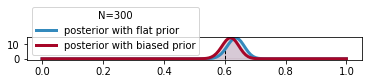

In [78]:
s

12

In [ ]:
import scipy.stats as stats

plt.figure(figsize=( 15, 18))

p = 0.5
beta1_params = np.array( [1.,1.] )  # FLAT 
beta2_params = np.array( [2,10] )
beta = stats.beta 

x = np.linspace(0.00, 1, 125)
data = stats.bernoulli.rvs(p,size=500)   #LIKELIHOOD

for i,N in enumerate([0,4,8, 32,64, 128, 500]):
    s = data[:N].sum() 
    plt.subplot(8,1,i+1)
    params1 = beta1_params + np.array( [s, N-s] )    # posteriors beta parameters
    params2 = beta2_params + np.array( [s, N-s] )
    
    y1,y2 = beta.pdf( x, *params1), beta.pdf( x, *params2)  # the posterior 
    plt.plot( x,y1, label = r"posterior with flat prior", lw =3, color ="#348ABD" )
    plt.plot( x, y2, label = "posterior with biased prior", lw= 3, color ="#A60628" )
    plt.fill_between( x, 0, y1, color ="#348ABD", alpha = 0.15) 
    plt.fill_between( x, 0, y2, color ="#A60628", alpha = 0.15) 
    plt.legend(title = "N=%d"%N)
    plt.vlines( p, 0.0, 7.5, linestyles = "--", linewidth=1)
    #plt.ylim( 0, 10)#

# Summary Stats

In [254]:
# Percent of time there is not consensus on a single payload within a task

# Group by task, and payload. Annotations will indicate whether consensus or not
df = ((dfpayloads.groupby([ 'task_id', 'payload','annotation']).size()).to_frame()).reset_index()
df['count'] = df[0]

# ID consensus, discrepancies
discrepancies = df[df['count']!=5] 
discrepancies = ((discrepancies.groupby([ 'task_id', 'payload']).count())).reset_index()
        # ^ this is because payloads can be duplicated (so I can't do unique)
consensus = df[df['count']==5] #29918
consensus= consensus.groupby([ 'task_id', 'payload' ]).sum()['count'].reset_index()

# total
total = df.groupby([ 'task_id', 'payload' ]).sum()['count'].reset_index()
         # ^ this is because payloads can be duplicated (so I can't do unique)

consensus1 = 1-(discrepancies.payload.shape[0] /(total.payload.shape[0]))
consensus2 = 1-(discrepancies.payload.shape[0] /(consensus.payload.shape[0] + discrepancies.payload.shape[0] ))

print((consensus1*100),'% of the time there is consensus on a single payload within a task.',
      'Assuming the consensus is generally correct, this suggests Taskus is an effective resource')



89.05574923274038 % of the time there is consensus on a single payload within a task. Assuming the consensus is generally correct, this suggests Taskus is an effective resource


In [315]:
## For each user, how often do How often is this person the only person who disagrees?
lowagreement = dfpayloads.groupby(['payload', 'task_id', 'annotation']).size().to_frame(name = 'count').reset_index()
lowagreement = lowagreement[lowagreement['count'] == 1]
result = pd.merge(lowagreement,dfpayloads,  how = 'right', on=['payload', 'task_id','annotation'])

differ_from_others = ((result.groupby('user_id').count()['count_x'].to_frame())).sort_values('count_x', ascending=False).reset_index()

#total number of annotations that each person does 
total = dfpayloads.groupby(['user_id']).count()['payload'].to_frame(name = 'count').reset_index()

#calculations
perfmstat = pd.merge(differ_from_others,total,  on=['user_id'])
perfmstat['%'] = (perfmstat['count_x']/perfmstat['count'])*100
perfmstat = perfmstat.rename(index=str, columns={"count_x": "#timediffer", 'count': 'totalannot'})
print("Top users who are the *only* Taskus employee diverging from consensus (5)")
perfmstat.sort_values('%', ascending=False).reset_index()



Top users who are the *only* Taskus employee diverging from consensus (5)


,index,user_id,#timediffer,totalannot,%
0,0,30,270,5997,4.502251
1,2,22,166,4771,3.479354
2,1,29,192,7571,2.535993
3,3,37,152,7008,2.168950
4,6,38,105,5967,1.759678
5,4,46,120,7671,1.564333
6,5,21,116,7823,1.482807
7,8,36,80,6031,1.326480
8,12,40,71,6027,1.178032
9,7,39,83,7582,1.094698


In [339]:

xx = (dfpayloads[dfpayloads.user_id==30]).groupby([ 'annotation']).size().to_frame(name = 'count').reset_index()


print(29/(xx['count'].sum()))
xx


0.004835751208937802


,annotation,count
0,duplicate,550
1,non-duplicate,5418
2,unsure,29


In [340]:
xx = dfpayloads
xx = xx.groupby([ 'annotation']).size().to_frame(name = 'count').reset_index()
xx

,annotation,count
0,duplicate,9773
1,non-duplicate,158229
2,unsure,533


In [341]:
533/(xx['count'].sum())

0.0031625478387278605

In [346]:
lowagreement = dfpayloads.groupby(['payload', 'task_id', 'annotation']).size().to_frame(name = 'count').reset_index()
lowagreement = lowagreement[lowagreement['count'] == 1]
result = pd.merge(lowagreement,dfpayloads,  how = 'right', on=['payload', 'task_id','annotation'])
r30results = (result[result.user_id == 30]).groupby(['annotation']).size().to_frame(name = 'count').reset_index()
r30results

,annotation,count
0,duplicate,550
1,non-duplicate,5418
2,unsure,29


In [367]:
r = result.groupby(['annotation']).size().to_frame(name = 'count').reset_index()
533/(r['count']).sum()

0.0031625478387278605

In [ ]:
## Task summary

In [15]:
dfpayloads['startdate'] = (dfpayloads.created_at).apply(lambda x: str(pd.to_datetime(x))[0:11])
dfpayloads['enddate'] = (dfpayloads.updated_at).apply(lambda x: str(pd.to_datetime(x))[0:11])
np.sum(dfpayloads['enddate'][0:5] != dfpayloads['startdate'][0:5])
## everyone does it in one day

In [53]:
dfpayloads['starttime'] = (dfpayloads.created_at).apply(lambda x: (pd.to_datetime(str(x))))
dfpayloads['endtime'] = (dfpayloads.updated_at).apply(lambda x: (pd.to_datetime(str(x))))
dfpayloads['totaltime'] = (dfpayloads['endtime'] - dfpayloads['starttime'] )


The median amount of time taken per task id is 0 days 00:02:17.946000
The max amount of time taken per task id is 11 days 01:29:57.246000
The min amount of time taken per task id is 0 days 00:00:14.460000


In [55]:
print("The median amount of time taken per task id is %s"% (dfpayloads['totaltime'].median()) )
print("The 25th quantile of time taken per task id is %s"% (dfpayloads['totaltime'].quantile(0.25)) )
print("The 75th quantile of time taken per task id is %s"% (dfpayloads['totaltime'].quantile(0.75)) )
print("The max amount of time taken per task id is %s"% (dfpayloads['totaltime'].max()) )
print("The min amount of time taken per task id is %s"% (dfpayloads['totaltime'].min()) )

The median amount of time taken per task id is 0 days 00:02:17.946000
The 25th quantile of time taken per task id is 0 days 00:01:09.153000
The 75th quantile of time taken per task id is 0 days 00:05:29.377000
The max amount of time taken per task id is 11 days 01:29:57.246000
The min amount of time taken per task id is 0 days 00:00:14.460000


In [56]:
#rows, and categories in columns


from sklearn.metrics import cohen_kappa_score
labeler1 = [2, 0, 2, 2, 0, 1]
labeler2 = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(labeler1, labeler2)

0.4285714285714286

# Kappa

In [45]:
## collect payloads where the same people did the assessment
kappa = dfpayloads
for i,v in enumerate(kappa.payload.unique()[0:5]):
    sample = kappa[kappa.payload == v]
    
    print(sample.user_id.unique())

[20 40 43 37 16]
[20 40 43 37 16]
[20 40 43 37 16]
[20 40 43 37 16]
[20 40 43 37 16]


In [4]:
kappa = dfpayloads[['annotation', 'task_id', 'payload', 'user_id']] 
# payload is not unique
kappa['unique'] = (kappa.task_id).apply(lambda x: str(x)) + (kappa.payload).apply(lambda x: str(x))



In [26]:

kap["Pi"] = 0
for i in (range(20,30)):
    
    num = ((kap['duplicate'][i]**2 + kap['unsure'][i]**2 +kap['non-duplicate'][i]**2) - n)* (1/(n*(n-1)))
    print(i, ":", num )
    kap["Pi"][i] = num



20 : -2.9775181399006644e-05
21 : -2.9775181399006644e-05
22 : -2.9782284257164804e-05
23 : -2.9775181399006644e-05
24 : -2.9782284257164804e-05
25 : -2.9782284257164804e-05
26 : -2.9775181399006644e-05
27 : -2.9782284257164804e-05
28 : -2.9775181399006644e-05
29 : -2.9775181399006644e-05


In [37]:
len(kappa.payload.unique())

31877

In [61]:
kdf = dfpayloads[['annotation', 'task_id', 'payload', 'user_id']] 
# payload is not unique, so I made one. confirmed unique
kdf['unique'] = (kdf.task_id).apply(lambda x: str(x)) + (kdf.payload).apply(lambda x: str(x))

# get a count for annotation per task payload
kdf = pd.concat([kdf, (pd.get_dummies(kdf['annotation']))], axis =1)
df1 = (kdf.groupby([ 'unique', ]).sum()['duplicate'].to_frame().reset_index())
df2 = (kdf.groupby([ 'unique', ]).sum()['non-duplicate'].to_frame().reset_index())
df3 = (kdf.groupby([ 'unique', ]).sum()['unsure'].to_frame().reset_index())
kap = pd.merge(df1,df2, on = 'unique')
kap = pd.merge(df3, kap, on = 'unique' )

n = 5 # of unique raters
N = len(kap.unique.unique()) #number of tasks

kap["Pi"] = (((kap['duplicate']**2 + kap['non-duplicate']**2) + kap['unsure']**2) - n)*(1/(n*(n-1)))
Pbar = (np.sum(kap["Pi"]))*(1/N)

p1 = []


for i,v in enumerate(['duplicate', 'non-duplicate', 'unsure']):
    p = (np.sum(kap[str(v)]))/ (n*N)
    p1.append(p)

Pbare = np.sum([x**2 for x in p1])
Kappa = (Pbar - Pbare) / (1-Pbare)
Kappa


0.7081730251593465

In [168]:
df = ((dfpayloads.groupby([ 'task_id', 'payload', 'annotation']).size()).to_frame()).reset_index()
py = df[df[0] ==3]
py


,task_id,payload,annotation,0
93,56597,b8eb1aa7-aea7-4883-b633-a07e55ab33d8,non-duplicate,3
123,56600,27a48906-d08f-4099-ab57-2ceca230db23,duplicate,3
149,56601,c148a5d7-3d17-4197-9328-5b160ee8c860,duplicate,3
226,56606,e5099a5b-b3df-481b-986a-f853a5aeea92,non-duplicate,3
228,56606,eda967bb-f83d-4cb3-acf3-52102ca70d27,duplicate,3
246,56607,a860b046-4f47-4f82-9c18-a5a199cb9ab0,duplicate,3
259,56608,867ca6e4-2894-4813-8d4c-dec70e6941b6,duplicate,3
314,56612,3c8d3bb7-8718-47f2-8e1c-a382746062ef,duplicate,3
327,56612,ec9e8bda-2da8-4d79-9f29-2530681f2b8d,non-duplicate,3
378,56616,247c8dd9-cab0-4a94-be4f-248fb528b331,duplicate,3
